# Read IRIS Sample data

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()


,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Extract feature

In this example, we just just use 2 feature only to visualize featured in 2-dimension easily. 

In [3]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# Create model, training & Prediction

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)


     Sepal length  Sepal width  predict
0             5.1          3.5        2
1             4.9          3.0        2
2             4.7          3.2        2
3             4.6          3.1        2
4             5.0          3.6        2
5             5.4          3.9        2
6             4.6          3.4        2
7             5.0          3.4        2
8             4.4          2.9        2
9             4.9          3.1        2
10            5.4          3.7        2
11            4.8          3.4        2
12            4.8          3.0        2
13            4.3          3.0        2
14            5.8          4.0        2
15            5.7          4.4        2
16            5.4          3.9        2
17            5.1          3.5        2
18            5.7          3.8        2
19            5.1          3.8        2
20            5.4          3.4        2
21            5.1          3.7        2
22            4.6          3.6        2
23            5.1          3.3        2


# Visualize result

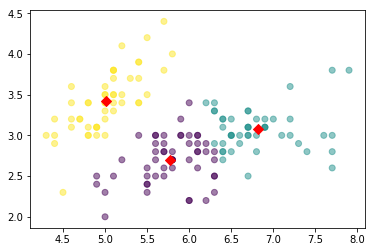

In [5]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

# Evaluate model with Cross tabuliazation

In [6]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         0   0  50
1        38  12   0
2        15  35   0


# Standarize value


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)


predict   0   1   2
labels             
0         1   0  49
1        36  13   1
2        20  30   0


# Feature distribution check

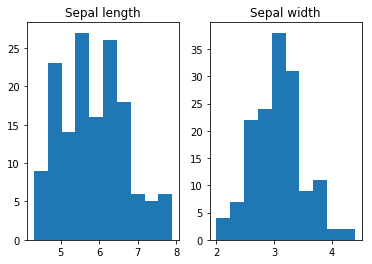

In [8]:
import matplotlib.pyplot  as plt

plt.subplot(1,2,1)
plt.hist(data['Sepal length'])
plt.title('Sepal length')
plt.subplot(1,2,2)
plt.hist(data['Sepal width'])
plt.title('Sepal width')
plt.show()

as u can see the graph, each featurs variation is not so different.<BR>
Sepal length range is 4~8 (4) <br>
Sepal width range is 2~5 (3) <br>
So, the stand scaler is not so effective 


# Determine number of clusters with Inertia value

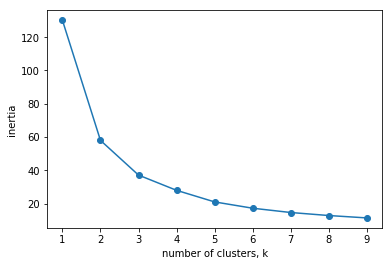

In [11]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

    